# Importation des packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Chargement des données

In [2]:
#Importation des données à partir du fichier Excel (Features colonnes K à AE et la colonne AT:NSP)
df = pd.read_excel('CTG.xls', sheet_name='Data', usecols='K:AE,AT', header=1)

In [3]:
df.head(6)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.000000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001049,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0


In [4]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
NSP         float64
dtype: object

In [5]:
df.shape

(2129, 22)

# Cleaning des données

In [6]:
#Suppresion des lignes contenant des NaN (Not a Number)
dataf=df.dropna()
dataf.shape

(2126, 22)

In [7]:
dataf.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [8]:
#renommage des colonnes pour une meilleure compréhension
dataf = dataf.rename(index=str, columns={"LB":"rythme_de_base","AC":"accelerations","FM":"mouvements_foetus","UC":"contractions", "DL":"decroissances_legeres", "DS":"decroissances_severes", "DP":"decroissances_prolonges"})

In [9]:
dataf.head(6)

,rythme_de_base,accelerations,mouvements_foetus,contractions,decroissances_legeres,decroissances_severes,decroissances_prolonges,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.000000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001049,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0


# Exploration des donnees

In [10]:
normal = dataf.NSP == 1
suspect = dataf.NSP == 2
pathologic = dataf.NSP == 3

In [11]:
#ajout de la colonne etat (duplication de la colonne NSP)
dataf["etat"] = dataf["NSP"]

In [12]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2125
Data columns (total 23 columns):
rythme_de_base             2126 non-null float64
accelerations              2126 non-null float64
mouvements_foetus          2126 non-null float64
contractions               2126 non-null float64
decroissances_legeres      2126 non-null float64
decroissances_severes      2126 non-null float64
decroissances_prolonges    2126 non-null float64
ASTV                       2126 non-null float64
MSTV                       2126 non-null float64
ALTV                       2126 non-null float64
MLTV                       2126 non-null float64
Width                      2126 non-null float64
Min                        2126 non-null float64
Max                        2126 non-null float64
Nmax                       2126 non-null float64
Nzeros                     2126 non-null float64
Mode                       2126 non-null float64
Mean                       2126 non-null float64
Median          

In [13]:
#remplacement des valeurs dans la colonne etat par les libellés correspondants
dataf.etat[dataf.etat == 3] = "pathologic"
dataf.etat[dataf.etat == 2] = "suspect"
dataf.etat[dataf.etat == 1] = "normal"

In [14]:
nb_normal = dataf[normal]["NSP"].count()
nb_suspect = dataf[suspect]["NSP"].count()
nb_pathologic = dataf[pathologic]["NSP"].count()

In [15]:
nb_normal, nb_suspect, nb_pathologic

(1655, 295, 176)

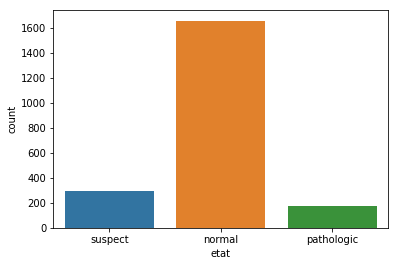

In [16]:
#graphe pour visualiser le nombre de cas dans chacunes des catégories
sns.countplot(dataf['etat'])

In [17]:
#Nombre Max et min de mouvements d'un foetus selon son etat
dataf.groupby(["NSP"])["mouvements_foetus"].max(), dataf.groupby(["NSP"])["mouvements_foetus"].min()

(NSP
 1.0    0.480634
 2.0    0.429894
 3.0    0.375439
 Name: mouvements_foetus, dtype: float64, NSP
 1.0    0.0
 2.0    0.0
 3.0    0.0
 Name: mouvements_foetus, dtype: float64)

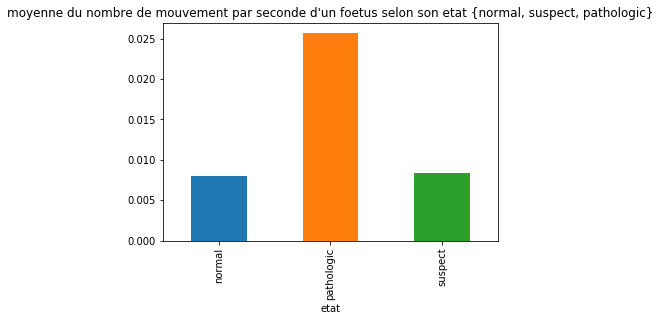

In [18]:
%matplotlib inline
dataf.groupby(["etat"])["mouvements_foetus"].mean().plot.bar(title="moyenne du nombre de mouvement par seconde d'un foetus selon son etat {normal, suspect, pathologic}")

In [19]:
dataf.groupby(["etat"])["contractions"].max(), dataf.groupby(["etat"])["contractions"].min()

(etat
 normal        0.014925
 pathologic    0.014374
 suspect       0.011331
 Name: contractions, dtype: float64, etat
 normal        0.0
 pathologic    0.0
 suspect       0.0
 Name: contractions, dtype: float64)

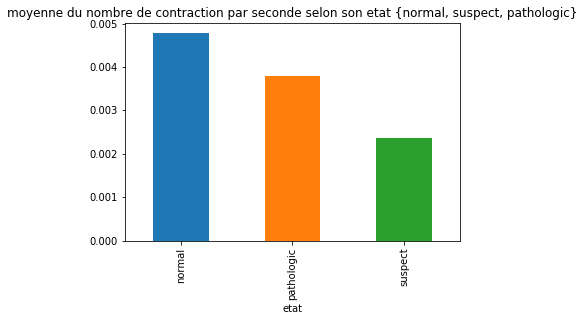

In [20]:
dataf.groupby(["etat"])["contractions"].mean().plot.bar(title="moyenne du nombre de contraction par seconde selon son etat {normal, suspect, pathologic}")

In [21]:
#Nombre max et min du rythme de base d'un foetus selon son etat
dataf.groupby(["etat"])["rythme_de_base"].max(), dataf.groupby(["etat"])["rythme_de_base"].min()

(etat
 normal        160.0
 pathologic    152.0
 suspect       159.0
 Name: rythme_de_base, dtype: float64, etat
 normal        106.0
 pathologic    110.0
 suspect       120.0
 Name: rythme_de_base, dtype: float64)

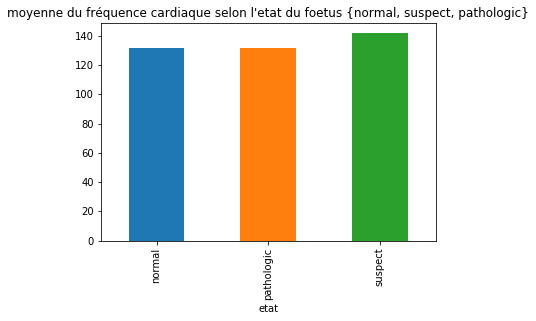

In [22]:
dataf.groupby(["etat"])["rythme_de_base"].mean().plot.bar(title="moyenne du fréquence cardiaque selon l'etat du foetus {normal, suspect, pathologic}")

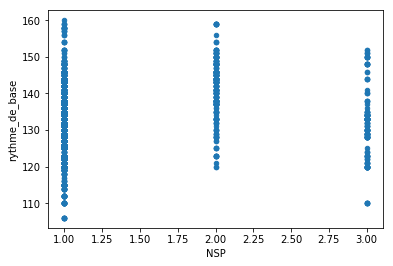

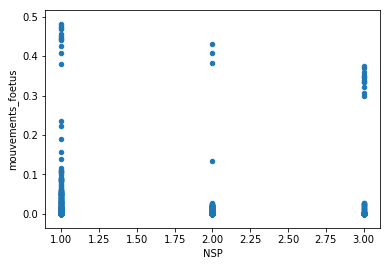

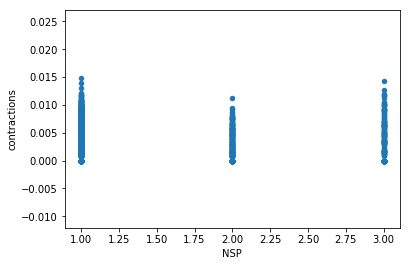

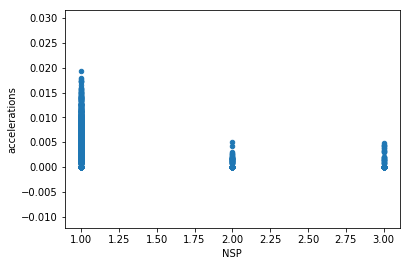

In [23]:
dataf.plot.scatter(x="NSP", y="rythme_de_base")
dataf.plot.scatter(x="NSP", y="mouvements_foetus")
dataf.plot.scatter(x="NSP", y="contractions")
dataf.plot.scatter(x="NSP", y="accelerations")

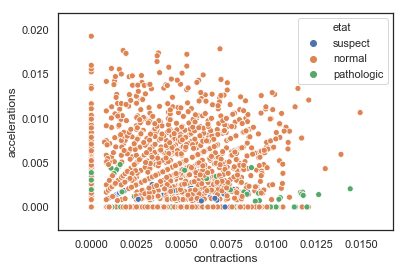

In [24]:
sns.set(style="white")
sns.scatterplot(x="contractions", y="accelerations", hue="etat", data=dataf)

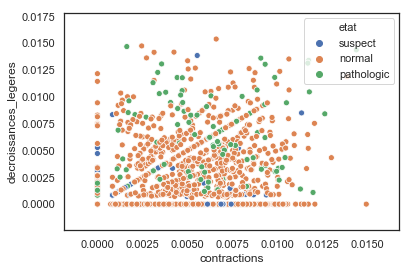

In [25]:
sns.scatterplot(x="contractions", y="decroissances_legeres", hue="etat", data=dataf)

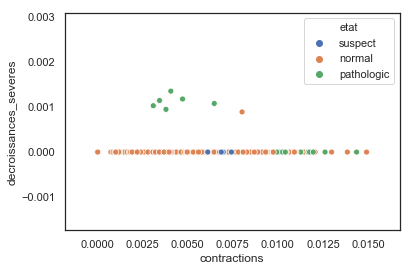

In [26]:
sns.scatterplot(x="contractions", y="decroissances_severes", hue="etat", data=dataf)

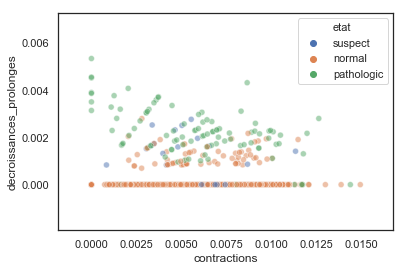

In [27]:
#Point interessant
sns.scatterplot(x="contractions", y="decroissances_prolonges",alpha=.5, hue="etat", data=dataf)

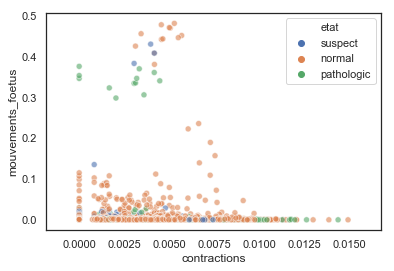

In [28]:
sns.scatterplot(x="contractions", y="mouvements_foetus", hue="etat",alpha=.6, data=dataf)

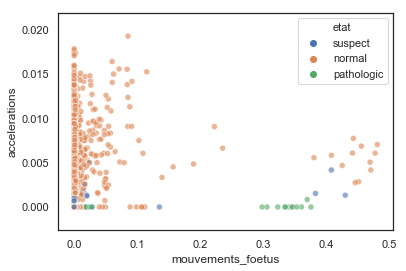

In [29]:
sns.scatterplot(x="mouvements_foetus", y="accelerations", hue="etat",alpha=.6, data=dataf)

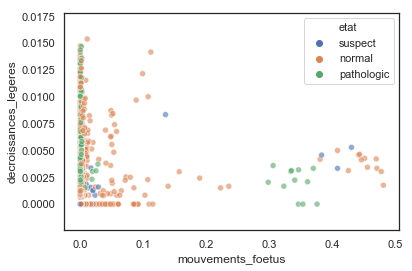

In [30]:
sns.scatterplot(x="mouvements_foetus", y="decroissances_legeres", hue="etat",alpha=.6, data=dataf)

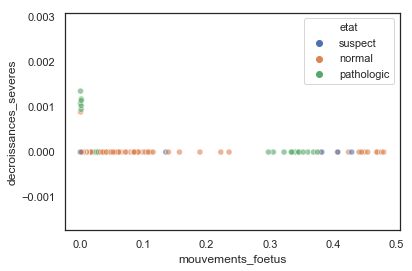

In [31]:
sns.scatterplot(x="mouvements_foetus", y="decroissances_severes", hue="etat",alpha=.6, data=dataf)

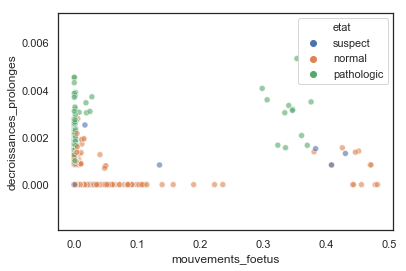

In [32]:
sns.scatterplot(x="mouvements_foetus", y="decroissances_prolonges", hue="etat",alpha=.6, data=dataf)

# Modelisation

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [34]:
#Séparation du dataset entre la cible y (NSP) et les 21 features X
X=dataf.drop(['etat','NSP'], axis=1)
y=dataf['NSP']

In [35]:
X.head()

,rythme_de_base,accelerations,mouvements_foetus,contractions,decroissances_legeres,decroissances_severes,decroissances_prolonges,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [36]:
y.head ()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: NSP, dtype: float64

In [37]:
#Train and Test splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print("X train  / y train =" , X_train.shape, y_train.shape)
print("X test  / y test   =" , X_test.shape, y_test.shape)

X train  / y train = (1700, 21) (1700,)
X test  / y test   = (426, 21) (426,)


In [39]:
#Standardisation des valeurs

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
#visualisation des données après le scaling (2 premières lignes)
X_train[:2]

array([[-0.81890715, -0.82488035, -0.20411694,  1.21989242, -0.63516874,
        -0.06374915, -0.27055008, -0.85965686, -0.26258884, -0.36703781,
         0.82903218, -0.500418  ,  0.09015075, -0.94749358, -0.01460696,
        -0.44531299, -0.68027433, -0.60330745, -0.74290279, -0.58051372,
        -0.51669716],
       [ 0.69242905, -0.82488035, -0.20411694, -0.99278851, -0.63516874,
        -0.06374915, -0.27055008,  0.76272307, -0.60448392,  1.23386142,
         0.51383432,  1.26714595, -0.4822035 ,  1.97529779,  1.6862038 ,
        -0.44531299,  0.2222279 ,  0.41430155,  0.28143057, -0.54596417,
        -0.51669716]])

# Choisir un algorithme et le tester

# Exemple 1: Random Forest Classifier

In [41]:
#rfc Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [42]:
#performance du modele
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.91      0.77      0.83        64
         3.0       0.90      0.93      0.92        29

   micro avg       0.95      0.95      0.95       426
   macro avg       0.92      0.89      0.91       426
weighted avg       0.95      0.95      0.95       426

[[328   4   1]
 [ 13  49   2]
 [  1   1  27]]


# Exemple 2: SVM Classifier

In [43]:
#clf SVM Classifier
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf= clf.predict(X_test)

In [44]:
#performance du modele
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       333
         2.0       0.71      0.73      0.72        64
         3.0       0.92      0.76      0.83        29

   micro avg       0.91      0.91      0.91       426
   macro avg       0.86      0.82      0.83       426
weighted avg       0.91      0.91      0.91       426

[[318  14   1]
 [ 16  47   1]
 [  2   5  22]]


# Exemple 3: Neural Network

In [45]:
#mplc Neural Network Classifier
mlpc=MLPClassifier(hidden_layer_sizes=(21,21,21),max_iter=800)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

In [46]:
#performance du modele
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

         1.0       0.95      0.94      0.95       333
         2.0       0.68      0.73      0.71        64
         3.0       0.83      0.83      0.83        29

   micro avg       0.90      0.90      0.90       426
   macro avg       0.82      0.83      0.83       426
weighted avg       0.90      0.90      0.90       426

[[313  19   1]
 [ 13  47   4]
 [  2   3  24]]


# Optimisation des hyperparametres avec grid search

In [47]:
#from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
algorithm = svm.SVC(kernel='linear')
parameters = { 'gamma':[0.01, 0.1, 0.5] }
grid = GridSearchCV(algorithm, parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9088235294117647 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Affinage du grid search

In [48]:
parameters = { 'C' :[0.5, 1, 1.5] , 'gamma' :[0.5, 0.1, 0.15] }
grid = GridSearchCV(algorithm, parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.91 SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [49]:
parameters = { 'C' :[1.5, 2, 2.5] , 'kernel' : ['rbf', 'poly', 'sigmoid'] , 'gamma' :[0.05, 0.10, 0.15] }
grid = GridSearchCV(algorithm, parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9211764705882353 SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [50]:
parameters = { 'C' :[4, 5, 6, 7] , 'kernel' : ['rbf'] , 'gamma' :[0.03, 0.05, 0.07], "degree" :[1,2,3] }
grid = GridSearchCV(algorithm, parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9317647058823529 SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [51]:
parameters = { 'C' :[7, 10, 15] , 'kernel' : ['rbf'] , 'gamma' :[0.02, 0.03, 0.04], "degree" :[1,2] }
grid = GridSearchCV(algorithm, parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9317647058823529 SVC(C=15, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.04, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Courbe ROC

# La courbe ROC nécessite une classification binaire

# Simplification de l'étude sur une cible binaire

In [52]:
#on revient sur df le data frame du départ
#renommage de la colonne NSP en cible
df = df.rename(index=str, columns={"NSP":"cible"})

#Suppresion des lignes contenant des NaN (Not a Number)
df=df.dropna()
df.shape

(2126, 22)

In [53]:
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,cible
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.000000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001049,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000000,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [54]:
#valorisation cible binaire à 0 et 1 (0: foetus normal, 1:foetus suspect ou pathologic)
df.cible[df.cible == 1] = 0
df.cible[df.cible == 2] = 1
df.cible[df.cible == 3] = 1

In [55]:
#affichage des 10 première lignes pour verifier la valorisation de la cible sur 2 valeurs 0 ou 1
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,cible
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.000000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
5,134.0,0.001049,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,1.0
6,134.0,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,1.0
7,122.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1.0
8,122.0,0.000000,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1.0
9,122.0,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,1.0


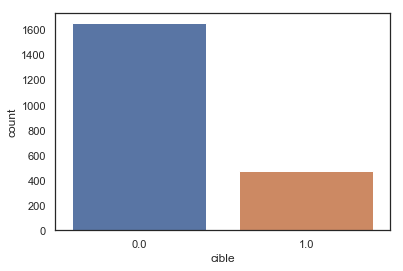

In [56]:
#graphe pour visualiser le nombre de cas normaux (cible=0) et le nombre de cas suspects ou pathologic (cible=1)
sns.countplot(df['cible'])

In [57]:
#Séparation du dataset entre la cible y (cible) et les 21 features X
X=df.drop(['cible'], axis=1)
y=df['cible']

In [58]:
#affichage des premières lignes pour verifier les 21 features en entrée
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [59]:
#affichage des premieres valeur de la cible
y.head(10)

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: cible, dtype: float64

In [60]:
#Séparation du jeux d'apprentissage et du jeux de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
#Standardisation des valeurs

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [62]:
print("X train  / y train =" , X_train.shape, y_train.shape)
print("X test  / y test   =" , X_test.shape, y_test.shape)

X train  / y train = (1700, 21) (1700,)
X test  / y test   = (426, 21) (426,)


# Visualisation des performances: Courbe ROC

In [63]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf= clf.predict(X_test)

In [64]:
#performance du modele
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       333
         1.0       0.84      0.84      0.84        93

   micro avg       0.93      0.93      0.93       426
   macro avg       0.90      0.90      0.90       426
weighted avg       0.93      0.93      0.93       426

[[318  15]
 [ 15  78]]


In [65]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
#Calcul des prédictions
y_preds = clf.predict_proba(X_test)

In [68]:
#On ne prend que la 2eme colonne pour ne pas que le classifier travaille sur la première
preds = y_preds[:,1]

In [69]:
# calcul des taux de faux positifs et vrais positifs
taux_faux_positifs, taux_vrais_positifs, _ = metrics.roc_curve(y_test, preds)

In [70]:
#Calcul de l'AUC : Aire sous la courbe (Area Under the Curve)
auc = metrics.auc(taux_faux_positifs, taux_vrais_positifs)

In [71]:
print (auc)

0.952823791533469


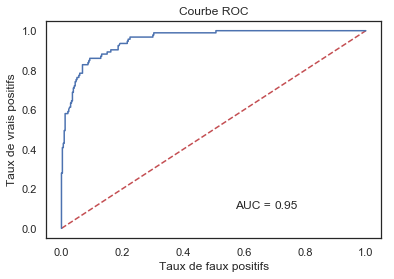

In [72]:
#tracage de la courbe avec Matplotlib
#affichage du titre de la courbe
plt.title('Courbe ROC')
#ajout de la diagonale
plt.plot([0,1],[0,1],'r--')
#ajout des libéllés
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.text(0.57, 0.1, 'AUC = ')
plt.text(0.7, 0.1, round(auc,2))
#Tracage de la courbe ROC(taux_faux_positifs, taux_vrais_positifs)
plt.plot(taux_faux_positifs, taux_vrais_positifs)